# Анализ сети фитнес-центров «Культурист-датасаентист» и подготовка плана действий по удержанию клиентов

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Цель проекта — провести анализ и подготовить план действий по удержанию клиентов.  

В задачи входят:

Прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
Формирование типичных портреты клиентов: выделить несколько групп и охарактеризовать их основные свойства;
Выявление основных признаков, наиболее сильно влияющих на отток;
Формирование основных выводов и разработка рекомендаций по повышению качества работы с клиентами:
Предложение мер по снижению оттока;


Сетью предоставлены:

Данные клиента за предыдущий до проверки факта оттока месяц
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента




**Выгрузка данных**

In [1]:
#выгрузка данных 
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv('...')
data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


Проведем исследовательский анализ данных

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [3]:
#проверим пропуски
data.isnull().sum()*100/len(data)

gender                               0.0
Near_Location                        0.0
Partner                              0.0
Promo_friends                        0.0
Phone                                0.0
Contract_period                      0.0
Group_visits                         0.0
Age                                  0.0
Avg_additional_charges_total         0.0
Month_to_end_contract                0.0
Lifetime                             0.0
Avg_class_frequency_total            0.0
Avg_class_frequency_current_month    0.0
Churn                                0.0
dtype: float64

Пропуски отсутсвуют

In [4]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Анализируемая таблица содержит 14 столбцов, каждой из которых присвовено 4000 значений, в свою очередь 4 столбца обладают типом данных float64 и 10 с типом int64, процент пропущенных значений во всех столбцах таблицы равен 0. В таблице выше представлены средние значения и стандартные отклонения по каждому столбцу а также минимальные и максимальные значения. Аномалии в таблице присуьсвуют, так как максимальные значения по некоторым параметрам сильно отличаются от средних. Пока обработка аномалий не требуется, так как эти данные могу иметь осоюое значение в анализе клиентов и их посещения.

In [5]:
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Рассматривая средние значения в разрезе двух групп — тех, кто ушел в отток и тех, кто остался, мы можем заметить отличия. Так, например, в группе 0 изначально берут абонемент на больший период, также они посетили большее количество занятий как за предыдущий месяц, так и за все время и принесли большую выручку от других услуг салона, чем в группа 1.

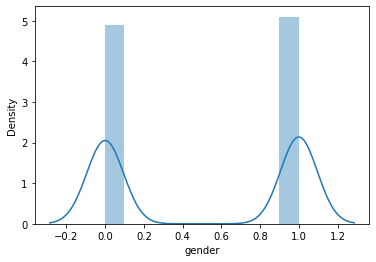

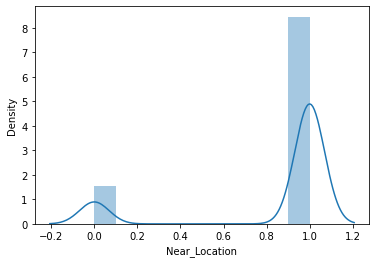

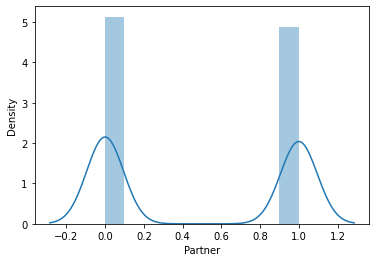

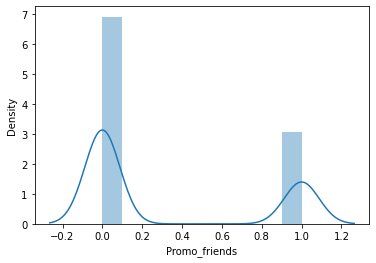

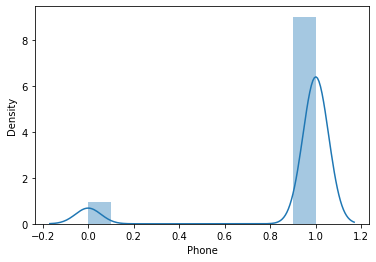

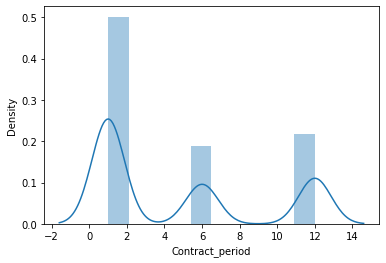

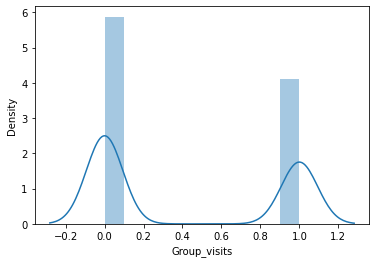

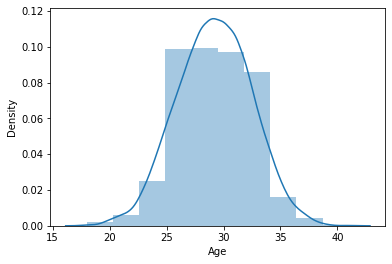

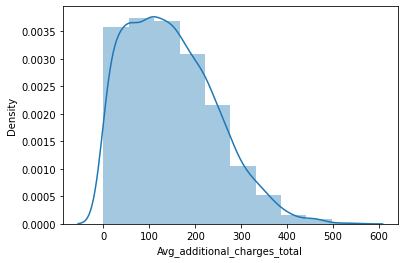

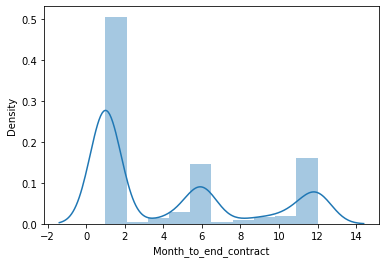

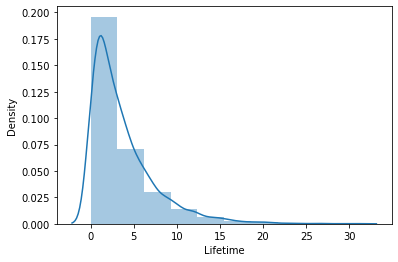

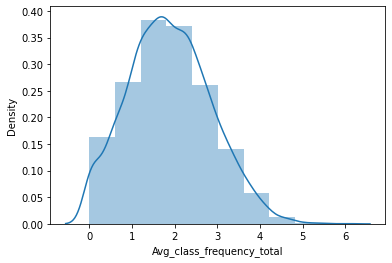

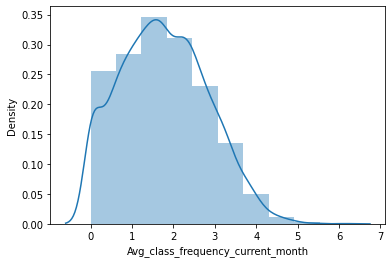

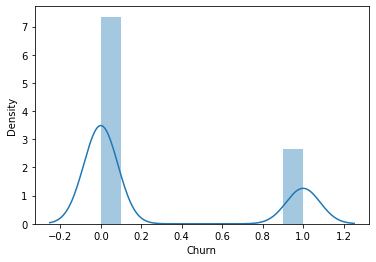

In [6]:
#строю столбчатую гистограмму для всех показателей  
import warnings
warnings.simplefilter('ignore') 
for feature in data.columns:
    sns.distplot(data[feature], bins=10)
    plt.show() 

In [7]:
#создам отдельный датафрейм для анализа количественных показателей
data_num = data[['Age', 'Lifetime', 'Month_to_end_contract', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total', 'Churn']]


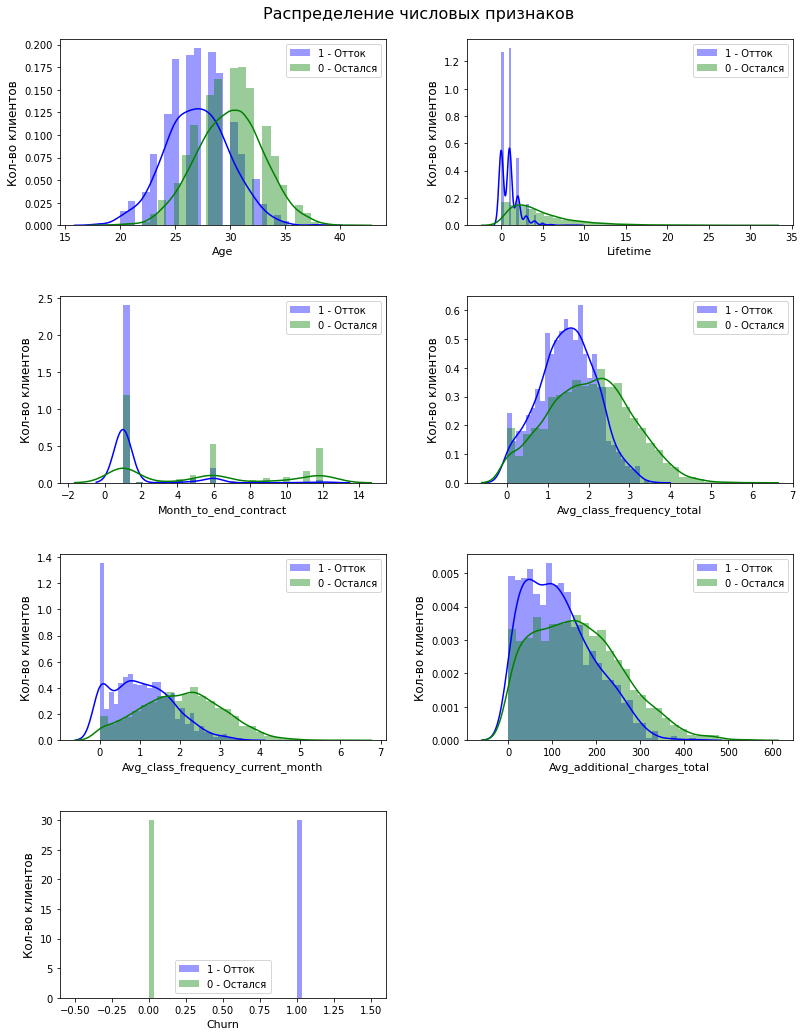

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,15))
axes_list = [item for sublist in axes for item in sublist]
 
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение числовых признаков', fontsize=16)
#axes_list[-2].axis('off')
axes_list[-1].axis('off')

for feature in data_num:
    ax = axes_list.pop(0)
    sns.distplot(data_num.query('Churn == 1')[feature], bins=30, ax=ax, kde=True, color='b',label='1 - Отток')
    sns.distplot(data_num.query('Churn == 0')[feature], bins=30, ax=ax, kde=True, color='g',label='0 - Остался')
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Кол-во клиентов', fontsize=12)
    ax.legend()
#хотелось бы подсказку о том как удалить последний граффик полностью

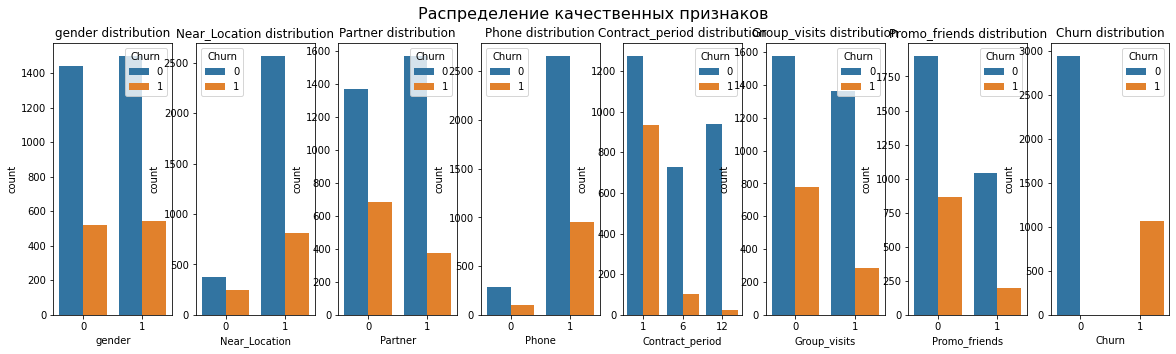

In [10]:
data_figg = data.columns[[0, 1, 2, 4, 5, 6, 3, -1]]  #выбираем колонки 

fig, ax = plt.subplots(1, 8, figsize=(20, 5)) #создаем фигуру 
                                                                                          
for num, col in enumerate(data_figg):    #отрисовываем в цикле, даем название
    sns.countplot(data = data, x = col, ax = ax[num], hue = 'Churn')    
    ax[num].set_title(f'{col} distribution')
    fig.suptitle('Распределение качественных признаков', fontsize=16)
    
#буду очень благодарна за подсказку как сделать это в 2 ряда, а то у меня при смене 2 строчки ошибка вылезает 
#

Как мы можем заметить, что результаты у тех ,кто ушел в этом месяце(группа 1) и тех, кто остался(группа 0) отличаются. Например,среди тех кто в группе оттока очень подавляющее количество клиентов не живут и не работают в районе, где находится фитнес-центр, что в целом моглол стать причиной оттока, а также ,судя по получившимся диаграммам, те кто остается в среднем старше тех, что перестал ходить в предыдущем месяце. Так как по некоторым критериям заметны довольно существенные отличия, нужно выделить их для формирования дальнейших рекомендаций.

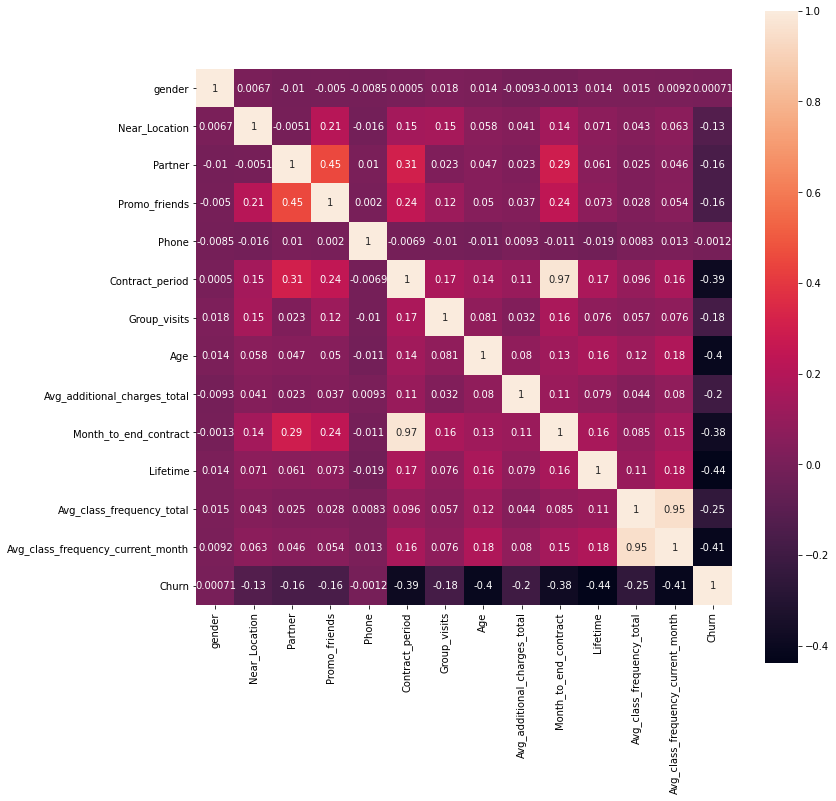

In [11]:
cm = data.corr() #вычисляем матрицу корреляций
fig, ax = plt.subplots(figsize=(12, 12))

#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True) #ваш код здесь
#ax.set_ylim(7, 0)  # корректировка "рваных" полей heatmap в последней версии библиотеки
plt.show()

На основе построенной матрицы корреляций мы можем отметить, что зависимости выше 0.44 по модулю не было замечено между никакими критериями, между логичной корреляции между посещаемостью от клиента за месяц и за весь период. Корреляция -0.44 отмечается между тем сколько времени прошло с момента первого обращения и тем ушел ли клиент в прошлом месяце или нет. Также есть зависимость 0.45 между тем является ли клиент сотрудник компании-партнёра и пользовался ли клиень промокодом.  В целом, сильной зависимости по большинству критериев не выявлено.

**Построим модель прогнозирования оттока клиентов**

В нашем случае целевой признак — факт оттока клиента в следующем месяце.

In [12]:
#разделяем данные на признаки (матрица X) и целевую переменную (y)
X = data.drop('Churn', axis = 1)
y = data['Churn']
#разделяем данные на признаки (матрица X) и целевую переменную (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
#Обучим модель на train-выборке двумя способами
#логистическая регрессия
#при этом методе стандартизация не необходима
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
# обучим модель
model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
probabilities = model.predict_proba(X_test)[:, 1]

# бинарный прогноз
predictions = model.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions)))

Accuracy: 0.93
Precision: 0.86
Recall: 0.83


In [16]:
#зададим алгоритм для новой модели на основе алгоритма случайного леса
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)  # Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test)[:,1] # Ваш код здесь
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)


#очень хотелось бы помощи касательно определения оптимального n_estimators, потому что я путем ручного перебора увидела что первая модель точнее, а вот как делать это правиоьно я не представляю

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


По метрикам тестируемых моделей мы можем отметить первую модель как более точную, так как ее показатели accuracy, precision и recall ближе к 1, а значит более точные.

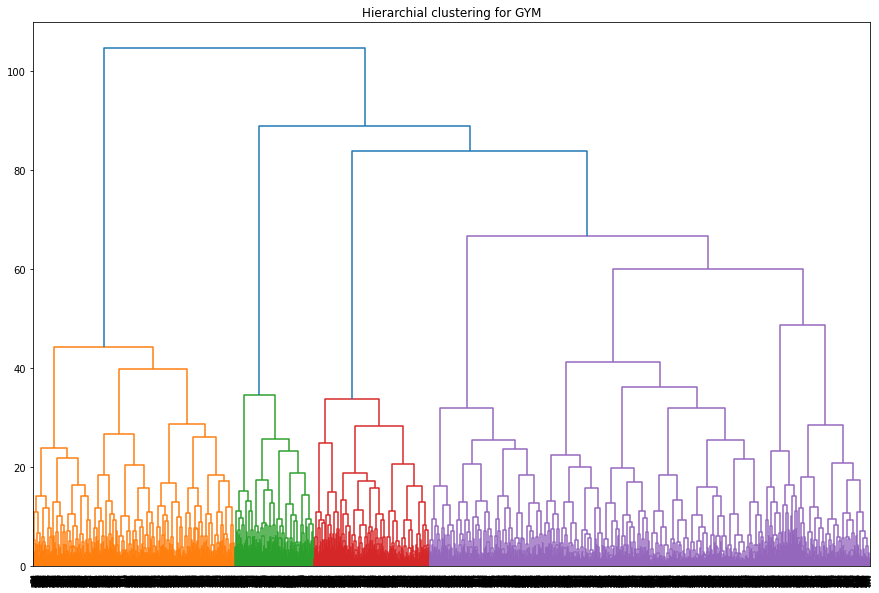

In [17]:
from sklearn.cluster import KMeans
import itertools
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

Предложенное оптимальное число кластеров 4 — четыре разных цветов на графике.

In [18]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 
data['cluster_km'] = labels
# выводим статистику по средним значениям признаков по кластеру
data.groupby('cluster_km').agg('mean')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


В целом сразу можно отметить, что средние значения в разных группах разные. Например, по параметру Near_Location кластер 2 отличается от остальных, так как там собрано большинство клиентов которые не работают и не живут в районе фитнес-центра или , как другой пример, группа с кластером 0 берут абонемент на больший период, чем остальные группы или группа 2 не оставляет контактный телефон. 

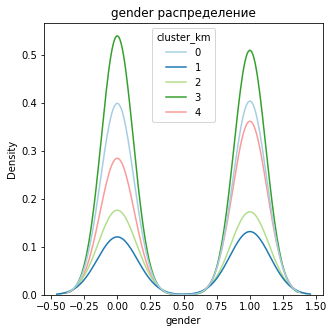

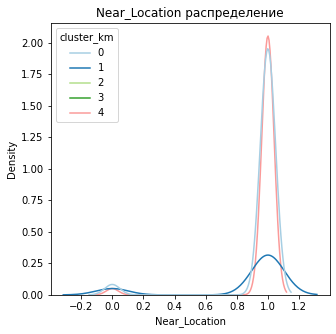

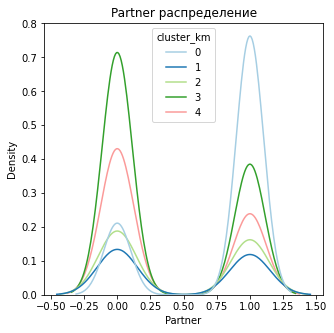

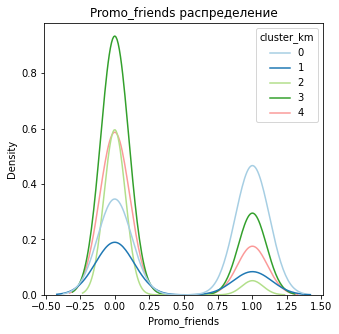

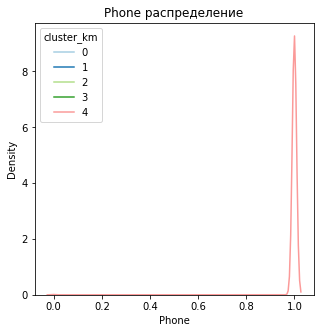

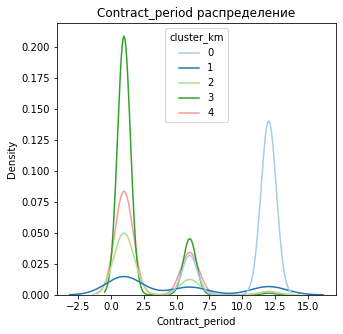

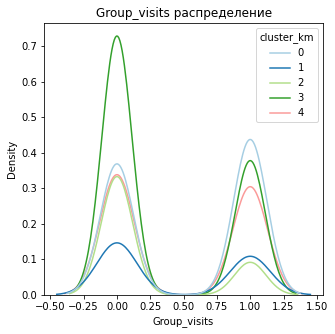

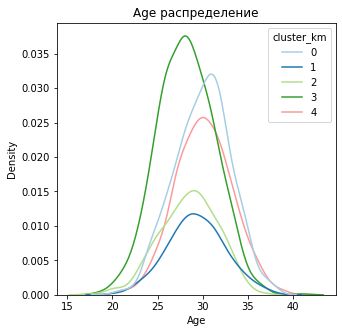

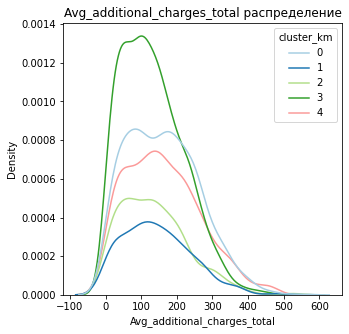

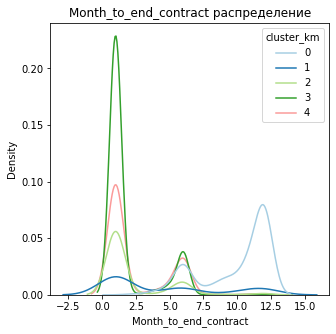

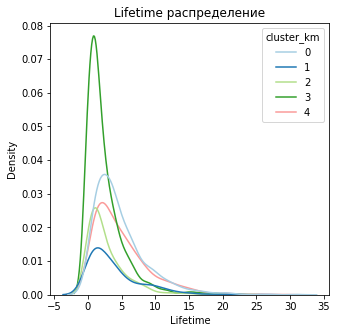

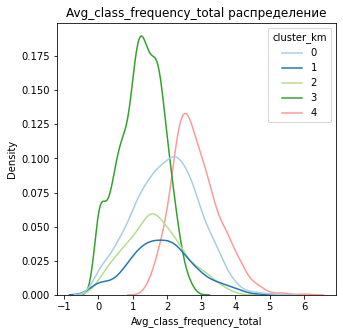

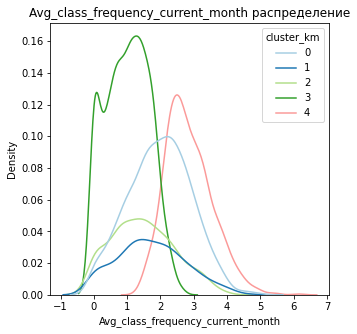

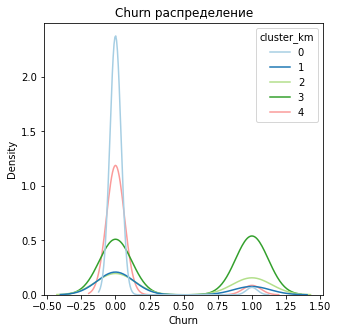

In [19]:
def show_clusters_on_plot(df, x_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.kdeplot(
        df[x_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} распределение'.format(x_name))
    plt.show()
col_pairs = list(itertools.combinations(data.drop('cluster_km', axis=1).columns, 1))
for pair in col_pairs:
    show_clusters_on_plot(data, pair[0], 'cluster_km')

Графики иллюстрируют все особенности каждой группы кластеров. В первую очередь можно заметить, что клиенты группы 0 и 4 намного чаще других работают или живут на районе фитнес-центра. Во-вторых, клиенты группы 0 чаще оказываются сотрудником компании-партнёра клуба, чем другие. В-третих, посетители группы 3 чаще берут абоменет на 1 месяц, в то время как у группа 0 чаще приобретает годовой. В-четвертых, гости группы 3 чаще остальных не посещают групповые занятия, когда клиенты с кластером 0 наоборот активно их посещают. В-пятых, к группе 3 относятся более молодые клиенты, по большей части от 20 до 30 лет, когда в группе 0 и 4 более взврослые посетители, от 30 до 35 лет.В-шестых,клиенты с кластером 3 приносят больше всего выручки от других услуг фитнес-центра. При этом в группе 3 клиенты чаще посещают фитнес-зал. 

In [20]:
#средняя доля оттока по каждому кластеру 
data.groupby('cluster_km')['Churn'].mean()

cluster_km
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: Churn, dtype: float64

На основе полученных результатов, мы можем сделать вывод, что самой надежной группой являются группа 0 и 4, так как их результаты ближе к 0(что судя по нашей таблице значит что клиенты не ушли в этом месяце), в то время как самыми ненадежными можно считать группу 3, так как в этой группе больше клиентов ушедших в этом месяце. Нужно строить статегию используя ключевые отличия между этими двумя категориями групп. 

**Выводы и базовые рекомендации**

Могу выделить две явно отличающиеся категории групп - 0 и 4 является более надежной, так как у нее меньшая доля оттока, клиенты здесь более взрослые, чаще посещают групповые занятия и покупают абонементы на больших срок, а также группа 3, противоположная относительно доли оттока, с более молодыми клиентами, покупающими абонемент на минимальный срок, но посещающих зал чаще чем противоположная группа, а также приносящая больше прибыли за от других услуг фитнес-центра.

Рекомендации :

Так как вы видим, что более молодые клиенты не покупают абонементы на продолжительный срок, однако приносят большую прибыль от дополнительной деятельности фитнес-зала, так что 

1. нужно создать условия, при которых покупка абонемента на несколько месяцев будет значительно выгоднее покупки абонемента на месяц, для того чтобы побудить самых прибыльных клиентов на более продолжительное время оставаться в фитнес-клубе(помимо увеличения скидки с увеличением количества покупаемых месяцев можно предлагать акцию при которой, например, при покупке 3 месяцев посещение 4 месяца стоит 1р)

2. самая прибыльная группа не посещает групповые занятия, что может быть исправлено добавлением новых молодежных(так как группа 3 более молодая) секций таких как ,например, йога в гамаке, VR-фитнес, Фитнес на батутах и тд

Для повышения прибыльности самой надежной группы стоит также изменить некоторые моменты:

3. добавить бонусы и скидки на дополнительные услуги для тех, кто покупает абонемент на более продолжительное время(так как группа с меньшей долей оттока покупает абонементы на большие сроки но по каким-то причинам редко пользуется оп услугами)

4. Также стоит обратить внимание на то, что посетители являющиеся сотрудниками компании-партнёра клуба тоже входят в более надежную группу, стоит расширить базу компаний-партнеров или увеличить спектр сотрудников, которым предоставляется скидка, чтобы привлечь новых надежных клиентов